#### Анализ GameDev индустрии.
Необходимо изучить данные по играм разного жанра на разных консолях в разных регионах.
Цель проекта, понять какие продукты потенциально популярны, для дальнейшего планирования рекламных компаний на 2017г.
Описание данных:
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
В процессе работы необходимо произвести следующие работы:
-Открыть файл с данным и изучить информацию;
-Подготовить данные;
-Провести исследовательский анализ данных;
-Составить портрет пользователя каждого региона;
-Сформулировать и проверить гипотезы;
-Оформить общий вывод

### Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

Импортируем все необходимые библиотеки

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Загрузили необходимые библиотеки, открыли файл и изучили информацию. Необходимо привести названия столбцов к нижнему регистру, навести порядок в типах данных, обработать пропуски и создать столбец с суммарными продажами во всех регионах. 

### Подготовка данных

In [6]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Привели наименования столбцов к нижнему регистру.

In [7]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки не информативны (слишком много пропусков) и их крайне мало. Можно удалить их без ущерба для анализа.

In [8]:
df = df.dropna(subset = ['name'])

Удалили строки.

In [9]:
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Учитывая, что строк крайне мало их тоже удаляем.

In [10]:
df = df.dropna(subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

Удалили строки с пустыми значениями и привели тип в целочисленный.

In [11]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan

df['user_score'] = df['user_score'].astype('float')

TBD - аббревиатура от английского To Be Determined (будет определено). Можно заменить на NaN. Привели тип к дробному. 

In [12]:
df.loc[df.loc[:,'rating'].isnull(),'rating'] = 'undefined'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заполнять попуски в critic_score, user_score и rating будет некорректно, тк в этом случае мы получим неточные результаты в стат анализе.

In [14]:
df.duplicated().sum()

0

Сделали проверку на дубликаты. Дубликатов нет.

In [15]:
df['total_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Создали столбец с суммарными продажами.

### Исследовательский анализ данных

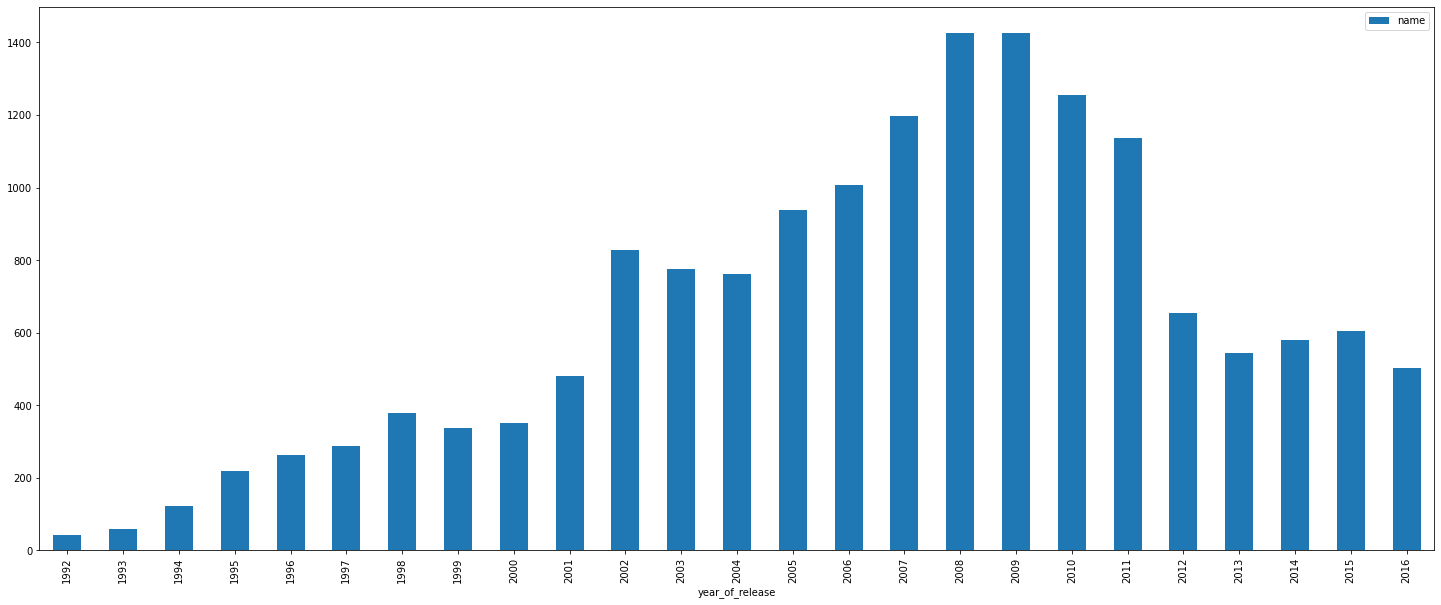

In [16]:
years_groupby = df.groupby('year_of_release').agg({'name':'count'})
years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (25,10));

Видно, что больше всего игр было выпущено с 2006 по 2011 года с пиком в 2008-2009 годах.

In [17]:
top10_platforms = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)[:10].index

platform_pivot_table_years = df.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')

platform_pivot_table_years['years'] =  platform_pivot_table_years.index
platform_pivot_table_years['years'] = platform_pivot_table_years['years'].apply (lambda row: row[1]).astype('int')

platform_pivot_table_years

total_sales  years
platform year_of_release                    
2600     1980                   11.38   1980
         1981                   35.68   1981
         1982                   28.88   1982
         1983                    5.84   1983
         1984                    0.27   1984
...                               ...    ...
XB       2008                    0.18   2008
XOne     2013                   18.96   2013
         2014                   54.07   2014
         2015                   60.14   2015
         2016                   26.15   2016

[238 rows x 2 columns]

Собрали таблицу из 10 самых популярных платформ

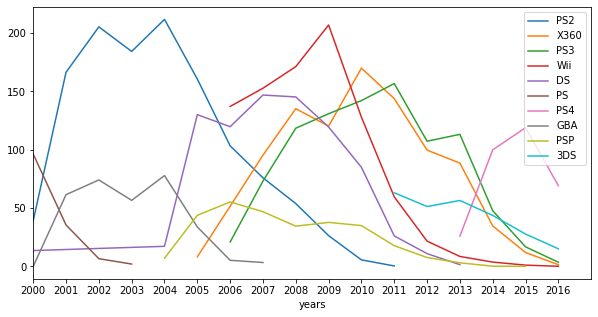

In [18]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in top10_platforms:
    platform_pivot_table_years.loc[platform].plot('years','total_sales', ax=ax)
ax.legend(top10_platforms,prop = {'size':10})
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(2000,2017))
ax.set_xticklabels(range(2000,2017))
plt.show()

Учитывая, что игровые консоли со временем теряют популярность(примерно "живут" 10 лет), необходимо определить наиболее актуальные период времени. Из графика видно, что это 2013-2016 гг.

In [19]:
period = (2013, 2016)
actual_data = df.query('@period[0] <= year_of_release <= @period[1]') 

actual_data['year_of_release'] = actual_data['year_of_release'].astype('int')

Возьмем актуальный период

In [20]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [21]:
actual_data_pivot_table = actual_data.pivot_table(index = ['year_of_release','platform'], 
                                                    values = 'total_sales',
                                                    aggfunc = 'sum')

pivot_table_index = actual_data_pivot_table.index.to_list()

actual_data_pivot_table["years"] = [year for year, platform in pivot_table_index]

actual_data_pivot_table.index = [platform for year, platform in pivot_table_index]

actual_data_pivot_table

,total_sales,years
3DS,56.57,2013
DS,1.54,2013
PC,12.38,2013
PS3,113.25,2013
PS4,25.99,2013
PSP,3.14,2013
PSV,10.59,2013
Wii,8.59,2013
WiiU,21.65,2013
X360,88.58,2013


Cобрали таблицу с продажами по годам для каждой консоли.

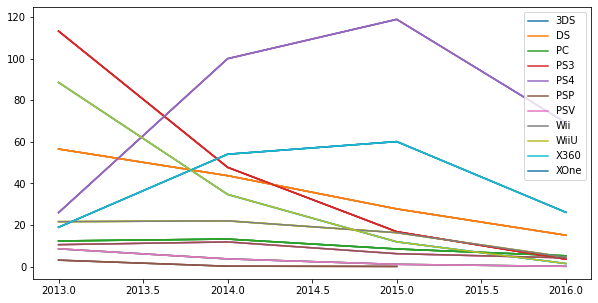

In [22]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in actual_data_pivot_table.index:
    ax.plot(actual_data_pivot_table.loc[platform]['years'],
            actual_data_pivot_table.loc[platform]['total_sales'])
ax.legend(actual_data_pivot_table.index.unique(),prop = {'size':10})
plt.show()

Из графика видно, что все консоли на данный момент снижаются по продажам. Некоторую стабильность показывают PSV, XOne и PC, их можно считать потенциально прибыльными. 

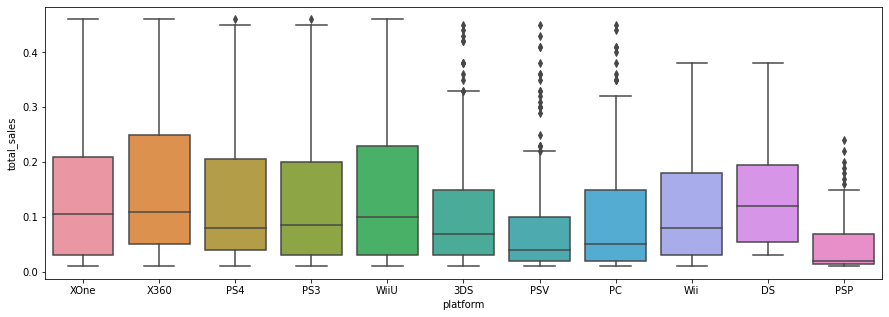

In [23]:
top_quantile = actual_data['total_sales'].quantile(0.75)
low_quantile = actual_data['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_data.query('total_sales <= @threshold'),ax=ax);

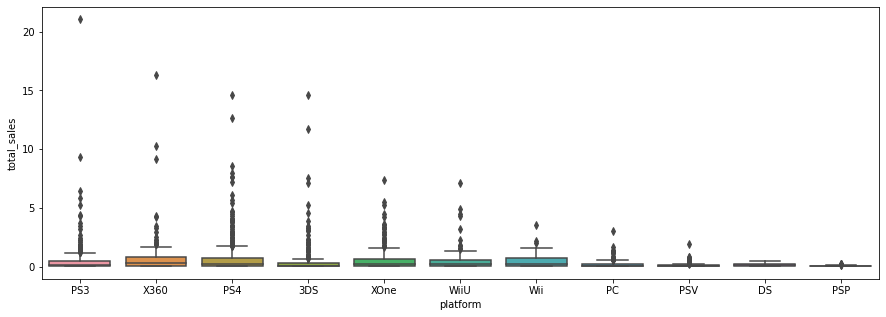

In [24]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = actual_data['platform'], 
            y = actual_data['total_sales']);
            

У большинства консолей значительная часть значений больше медианного. Наиболее равномерно распределены значения у платформы xone, ds. Если смотреть по полным данным, то видим, что выбросов нет у приставок PSP и DS. А самые далекие выбросы (и их много) у PS3, X360, PS4,3DS. Это популярные консоли и, выбросы, скорее всего, связаны с тем, что отдельные игры (типа GTA) являются сверхпопулярными и бьют все рекорды продаж на фоне остальных.

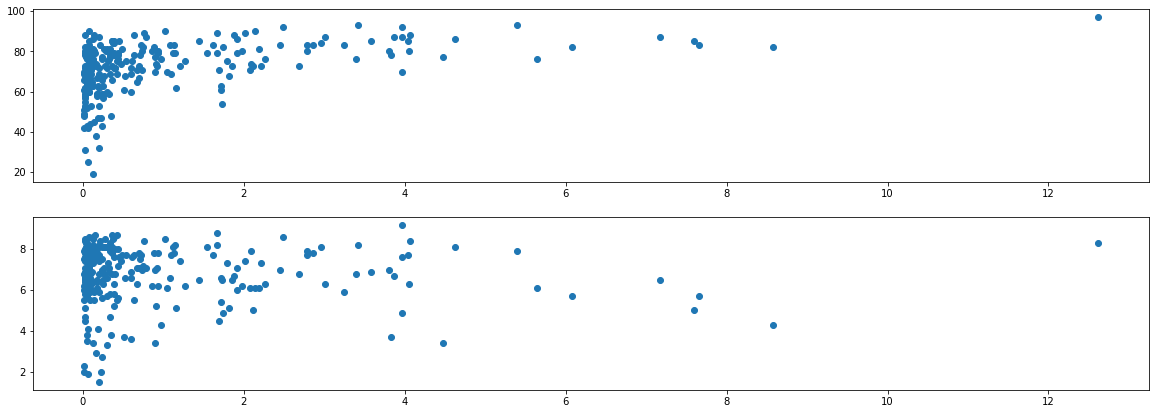

In [25]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =actual_data.query('platform == "PS4"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =actual_data.query('platform == "PS4"').dropna());

Из графика можно сделать вывод что, что корреляция между продажами и оценкой критиков сильнее

In [26]:
ps4_critic_score = actual_data.query('platform == "PS4"')['critic_score']
ps4_user_score = actual_data.query('platform == "PS4"')['user_score']
ps4_total_sales = actual_data.query('platform == "PS4"')['total_sales']

print(ps4_critic_score.corr(ps4_total_sales))
print(ps4_user_score.corr(ps4_total_sales))

0.40656790206178095
-0.031957110204556376


Корреляция с оценками критиков достаточно большая, около 40%. Корреляция с оценками пользователей отрицательная. вполне возможно, что при покупке игры, люди не обращают внимание на низкие оценки других пользователей, а смотрят на отзывы критиков.

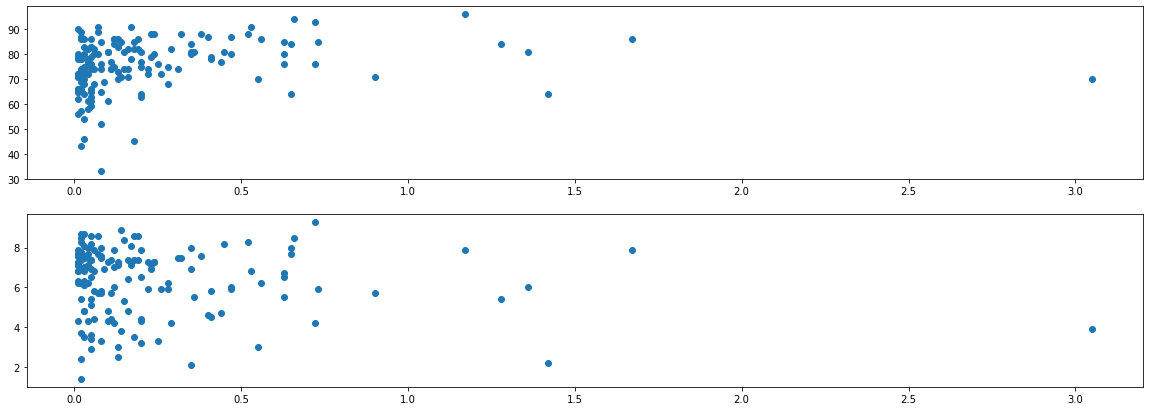

In [27]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =actual_data.query('platform == "PC"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =actual_data.query('platform == "PC"').dropna());

In [28]:
ps4_critic_score = actual_data.query('platform == "PC"')['critic_score']
ps4_user_score = actual_data.query('platform == "PC"')['user_score']
ps4_total_sales = actual_data.query('platform == "PC"')['total_sales']

print(ps4_critic_score.corr(ps4_total_sales))
print(ps4_user_score.corr(ps4_total_sales))

0.19603028294369382
-0.0938418695247674


На персональном компьютере наблюдается такая тенденция как и на PS4. Мееньше влияние критиков на продажи, отрицательная корреляция по оценкам пользователей практически такая же.

Из корреляционного анализа по двум платформам видно, что покупатели игр прислушиваются к мнению критиков. Но с оценками пользователей ситуация обратная. Кореляция хоть незначительная, но отрицательная. С чем это связано можно только предположить. Например, что покупатели не читают отрицательные отзывы пользователей. Либо пользователи пишут больше отрицательных отзывов, чем критики. Людям вообще свойствено писать плохие отзывы и забывать про хорошие.  

In [29]:
genre_analysis_pivot_table = actual_data.groupby('genre').agg({'name':'count','total_sales':['median','sum']}).reset_index()

genre_analysis_pivot_table.columns = ['genre', 'count', 'median','sum']

genre_analysis_pivot_table = genre_analysis_pivot_table.sort_values(by = 'sum', ascending = False)

genre_analysis_pivot_table.head()

,genre,count,median,sum
0,Action,766,0.110,321.87
8,Shooter,187,0.450,232.98
10,Sports,214,0.240,150.65
7,Role-Playing,292,0.125,145.89
3,Misc,155,0.100,62.82


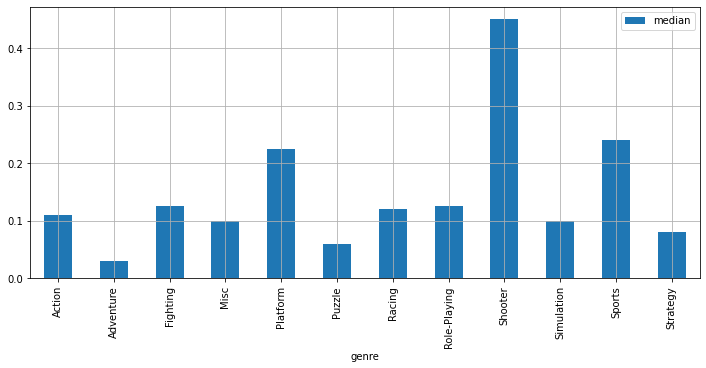

In [30]:
(
genre_analysis_pivot_table.pivot_table(index='genre', values='median')
.plot(grid=True, figsize=(12, 5), kind ='bar')
);

Видно, что не всегда количество игр жанра гарантирует высокие продажи, например, в жанре adventure выпущено много игр, но они имеют очень маленькое медианное значение продаж.  Если рассматривать только самые прибыльные жанры, то можно заметить, что в них сочетаются два параметра, у них большое количество игр и высокое медианное значение. Самые популярные жанры по медианному значению это  Shooter, Sports, Platform и Action. Наименее прибыльные Puzzle и Adventure.

In [31]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 291.3+ KB


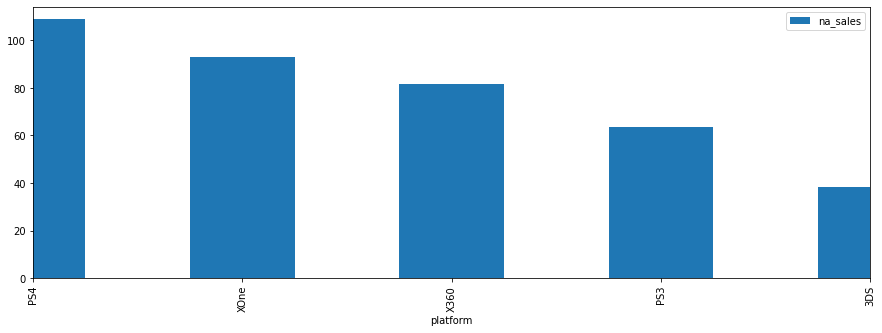

In [32]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.xlim([0, 4]);

Пользователи Северной Америки больше всего предпочитают Xbox360, потому что консоль американская. Платформы Wii, PS3, DS - пользуются также значительной популярностью, но они японские. В сумме продаж преобладают игры на японских консолях.

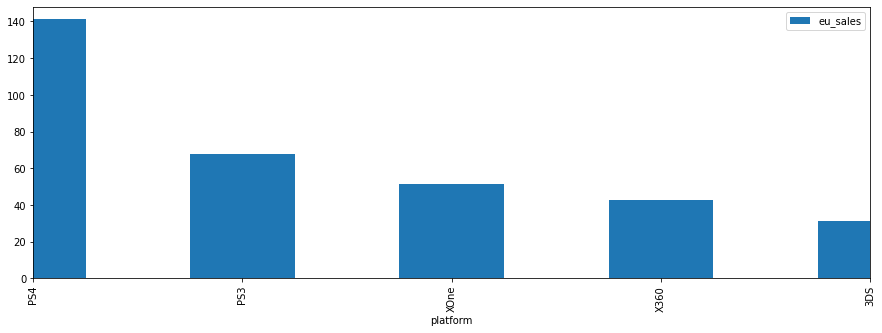

In [33]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.xlim([0, 4]);

У пользователей Европы популярны и японские платформы, и американская консоль Xbox360. В целом запросы такие же как у пользователей из Северной Америки

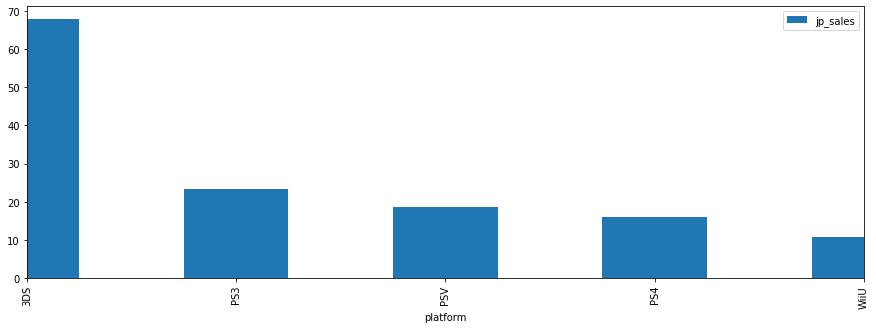

In [34]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.xlim([0, 4]);

Подавляющее большинство японских пользователей играют в японские платформы, что неудивительно из-за большого разнообразия платформ

Из гистограмм следует, что пользователи играют на консолях производства их стран.


In [35]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [36]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [37]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и игровая индустрия больше развита в домашнем уюте, поэтому популярны жанры - Action, Sports, Shooter. В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и редко играют в игры с жанром - shooter.

In [38]:
actual_data['region'] = actual_data['eu_sales'] + actual_data['jp_sales'] + actual_data['na_sales']
actual_data['region']

16       17.09
23       14.86
31       12.25
33       13.82
42       10.65
         ...  
16703     0.01
16707     0.01
16710     0.01
16712     0.01
16714     0.01
Name: region, Length: 2233, dtype: float64

In [39]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
undefined,78.91,85.05,89.42


Рейтинг влияет на продажи в отдельных регионах. Так, например, игры с рейтингом EC продавались в основном только в Северной Америке

Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и игровая индустрия больше развита в домашнем уюте, поэтому популярны жанры - Action, Sports, Shooter. В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и редко играют в игры с жанром - shooter.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [40]:
alpha = 0.05

sample_1 = actual_data[actual_data['platform'] =='XOne']['user_score']
sample_2 = actual_data[actual_data['platform'] =='PC']['user_score']

results = st.ttest_ind(sample_1.dropna(), sample_2.dropna(), equal_var=False)


print('р-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Тест показал, что нулевая гипотеза подтвердилась. Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC примерно равны.

H0: Средние пользовательские рейтинги жанров Action  и Sports  одинаковые

H1: Средние пользовательские рейтинги жанров Action  и Sports  разные

In [41]:
alpha = 0.05

sample_3 = actual_data[actual_data['genre'] =='Action']['user_score']
sample_4 = actual_data[actual_data['genre'] =='Sports']['user_score']

results = st.ttest_ind(sample_3.dropna(), sample_4.dropna(), equal_var=False)


print('р-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Тест показал, что нулевая гипотеза не подтвердилась. Можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

Был использован метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам st.ttest_ind. alpha была принята со значением 0,05

### Итоговый вывод:  

1. Мы привели в порядок датафрейм (изменили типы данных, убрали пропуски, привели столбци к нижнему регистру).

2. Провели исследовательский анализ данных:
-Посмотрели, сколько игр выпускалось в разные годы. Установили, важны ли данные за все периоды.
-Посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Установили за какой характерный срок появляются новые и исчезают старые платформы.
-Взяли данные за соответствующий актуальный период. Период выбрали так, чтобы эти данные помогли построить прогноз на 2017 год.
Выяснили какие платформы лидируют по продажам, растут или падают. Выбрали несколько потенциально прибыльных платформ.
-Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описали результат.
-Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Написали выводы.
-Соотнесли выводы с продажами игр на других платформах.
-Оценили общее распределение игр по жанрам. 

3. Составили портрет пользователя каждого региона.

4. Проверили гипотезы.

Определили критерии успешности игры на конец 2016 года (можно предположить, что и в 2017 году критерии не изменятся):

1. Регион
-Рейтинг ассоциации, определяющей возрастной рейтинг компьютерных игр
-Платформа, которая наиболее распространена в данном регионе
-Жанр

2. Рейтинг критиков (влияет на количество продаж во всех регионах)

-Игры, которые будут продаваться в Северной Америке лучше всего:
-ESRB: E, M, T
-Платформ(в порядке убывания): Xbox360, Wii, PS3, DS
-Жанры: Action, Sports, Shooter, Misc, Role-Playing

Игры, которые будут продаваться в Европе лучше всего:
ESRB: E, M, T
Платформы: в PS3, Xbox360, Wii, DS
Жанры: Action, Sports, Shooter, Misc, Racing

Игры, которые будут продаваться в Японии лучше всего:
ESRB: E, T, M
Платформы: DS, 3DS, PS3, PSP, Wii
Жанры: Role-Playing, Action, Misc, Sports, Platform

